In [1]:
#All the import statements goes here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

path_list = ["J:/SF/Thermal Load Prediction/Datas/Open Power System Data/opsd-household_data-2017-09-01/",
             "/Volumes/ADITHYA/Adithya/ML materials/DATA SETS/Open Power System /opsd-household_data-2017-09-01/"]

if("adithya" in os.getlogin()):
    path = path_list[1]
else :
    path = path_list[0]

In [2]:
# read1 contains all rows and columns from csv file
read1 = pd.read_csv(path+"household_data_1min_singleindex.csv")

# read will have columns with load data
read = read1[read1.columns[2:11]]
x = np.array(read.values)

# t is to find out which minute in the data has minimum occurances of NaN
t = np.zeros(shape=(60))

for i in range(60):
    j=i;
    c=0
    while(j <= x.shape[0]-1):
        c1=0
        for k in x[j]:
            if(np.isnan(k)):
                c1+=1
        if(c1!=0):
            c+=1
        j+=60
    t[i]=c
    
# amin(t) gives minimum count and argmin(t)+1 gives minute value
print(np.amin(t))
print(np.argmin(t)+1)

1290.0
10


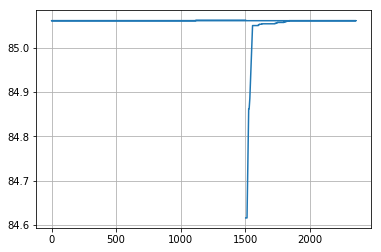

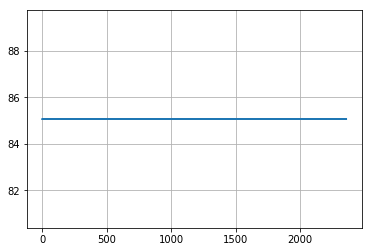

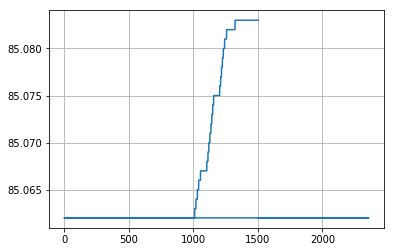

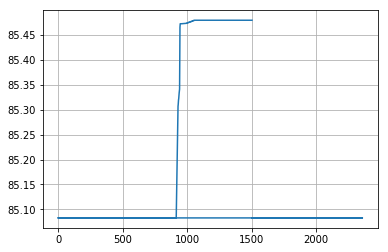

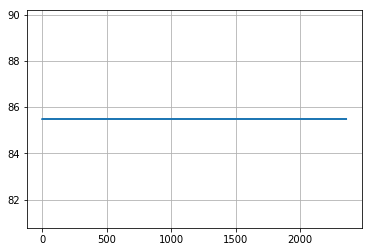

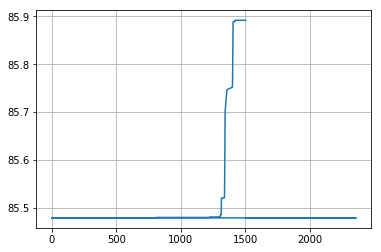

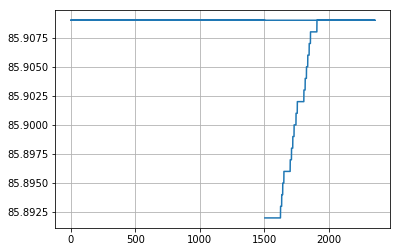

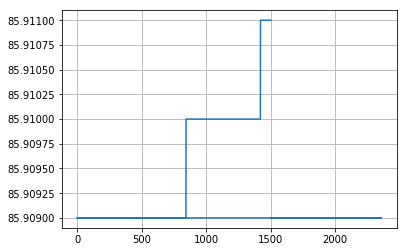

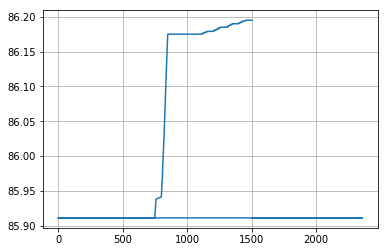

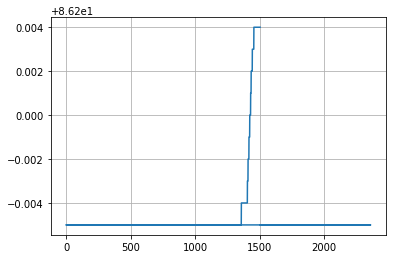

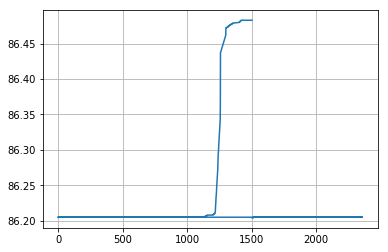

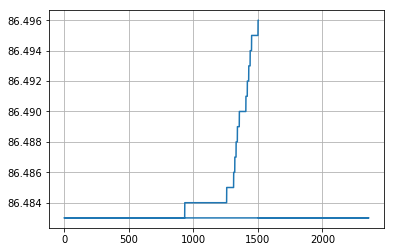

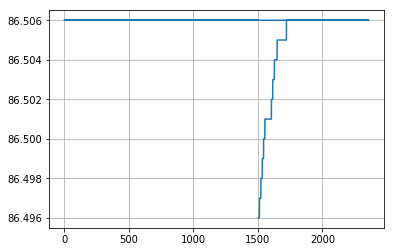

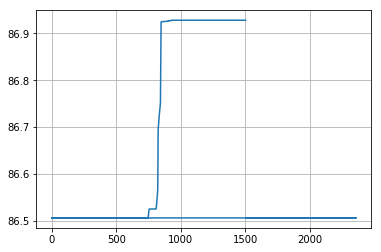

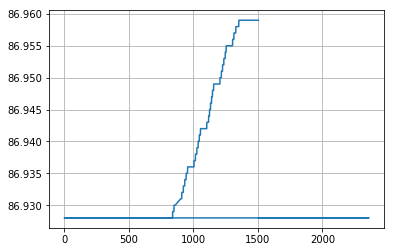

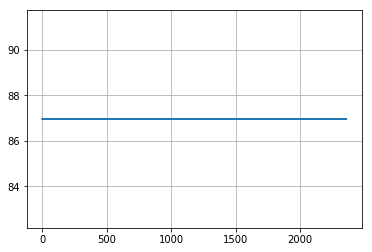

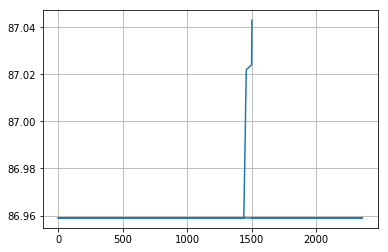

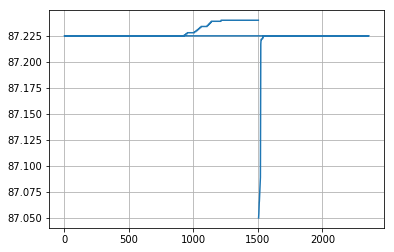

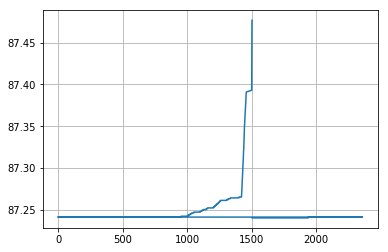

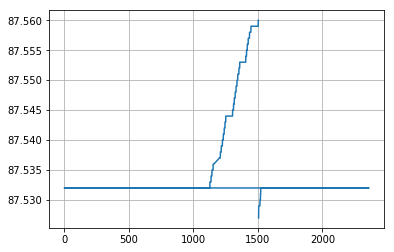

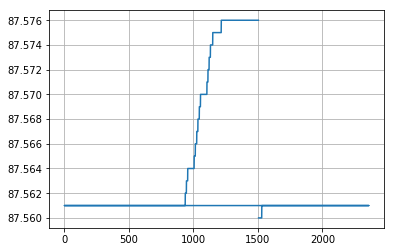

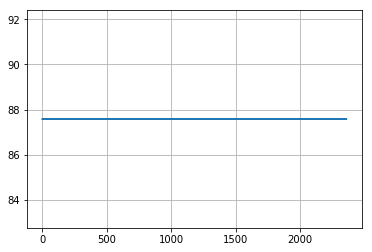

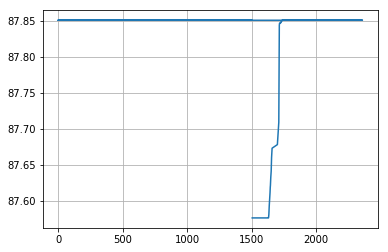

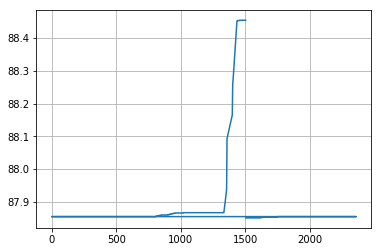

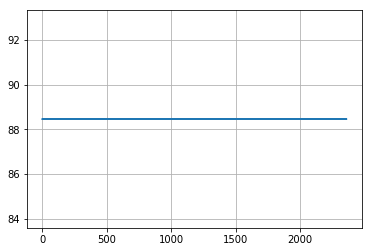

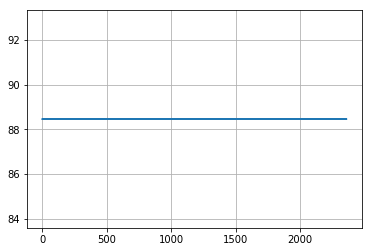

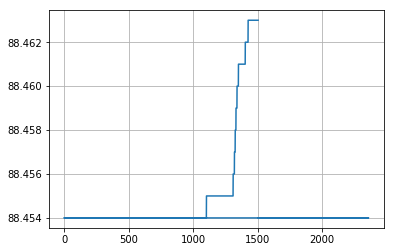

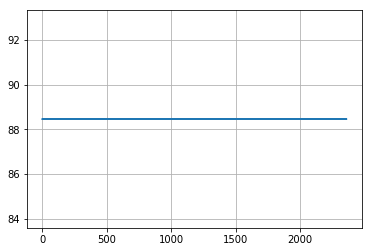

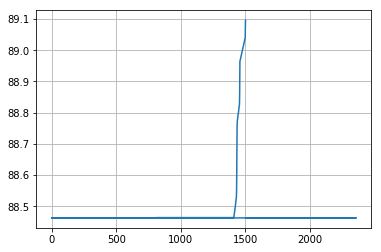

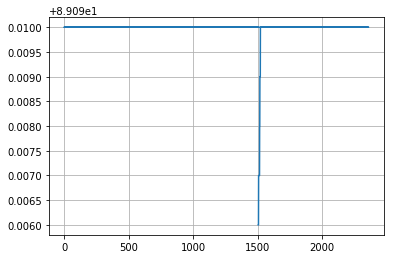

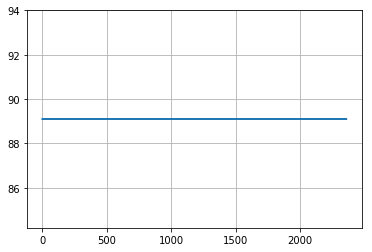

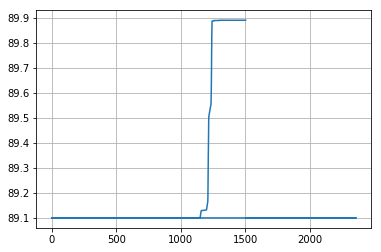

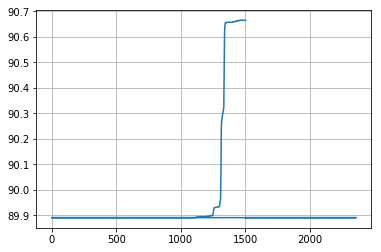

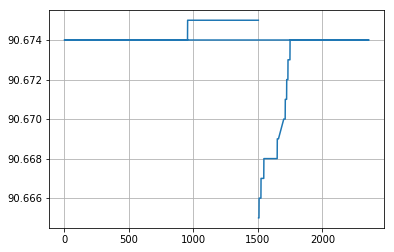

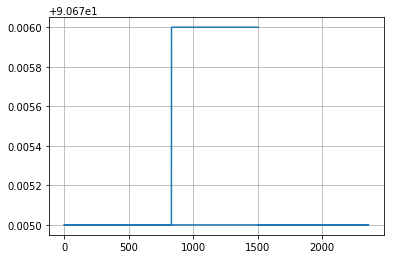

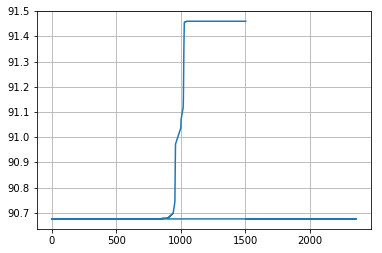

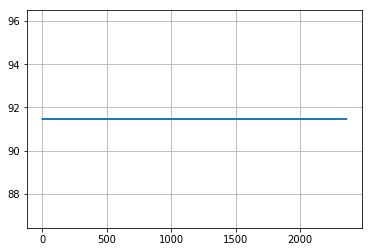

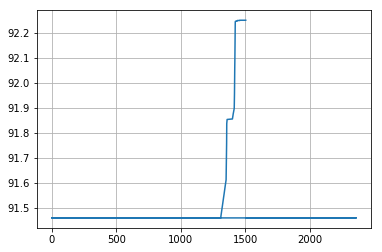

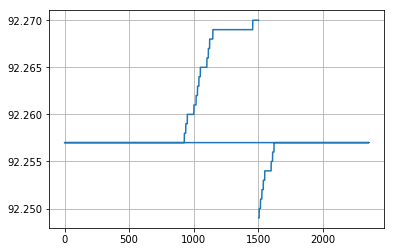

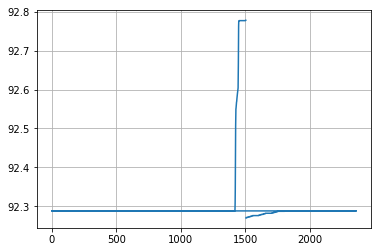

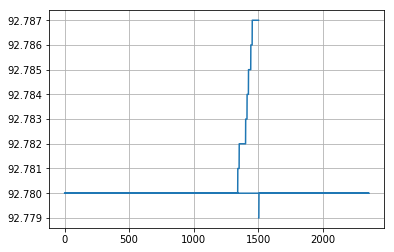

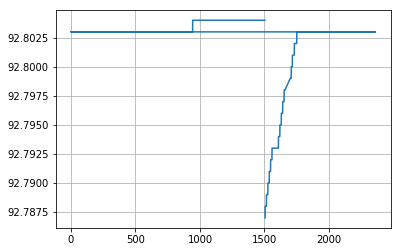

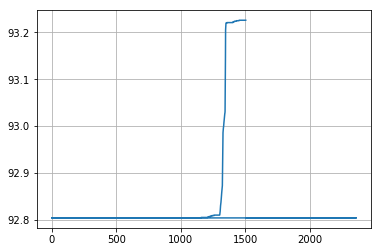

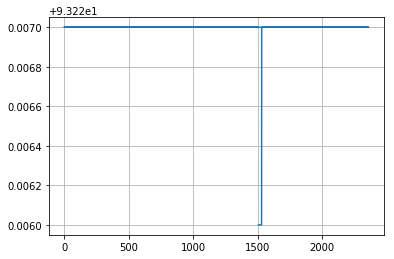

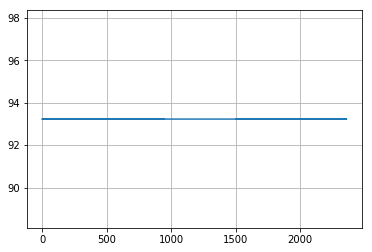

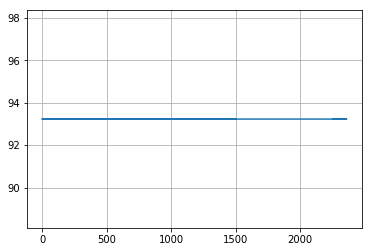

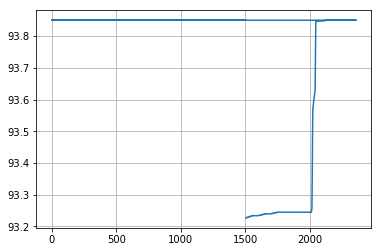

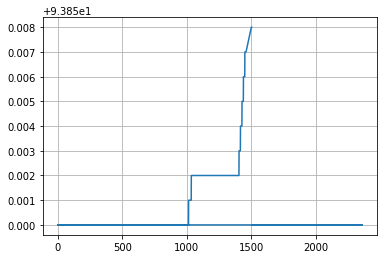

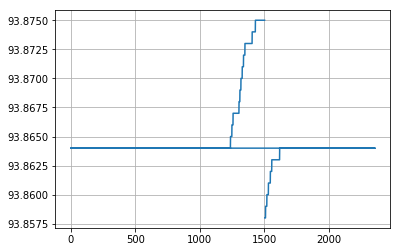

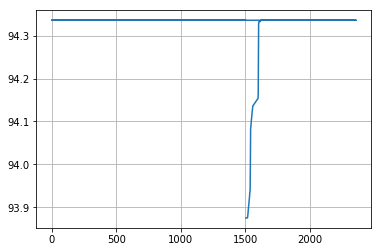

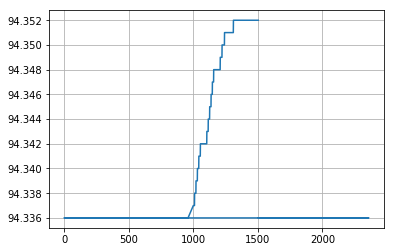

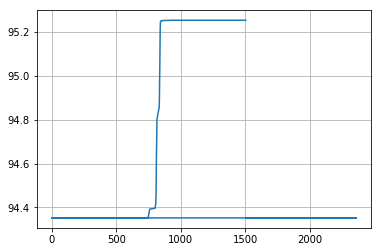

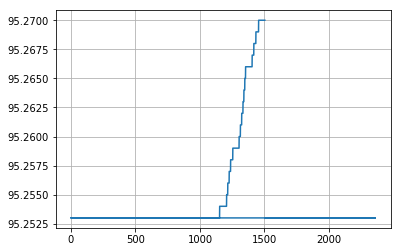

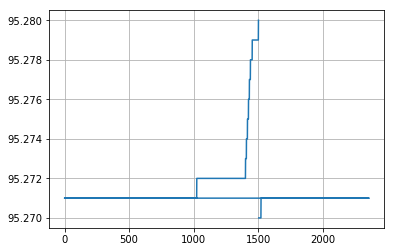

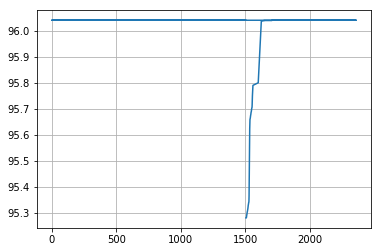

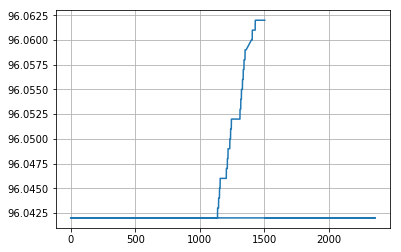

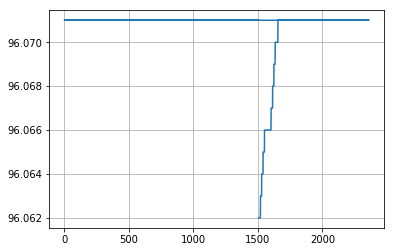

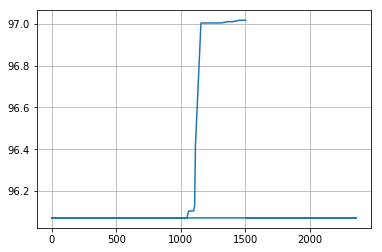

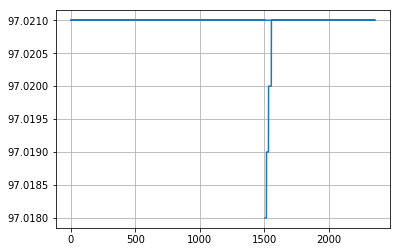

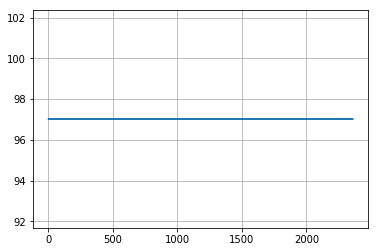

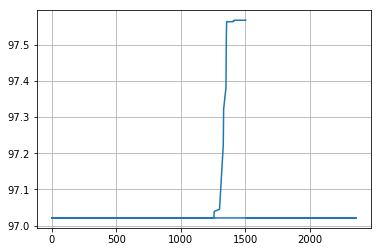

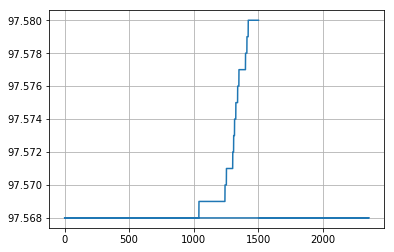

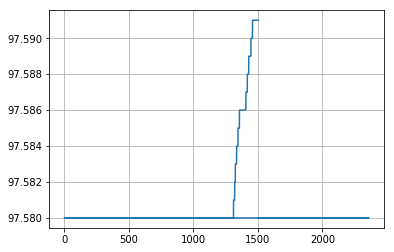

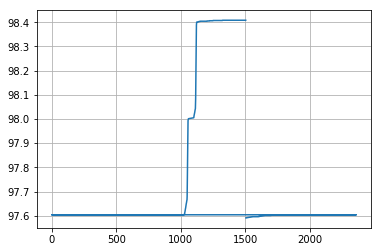

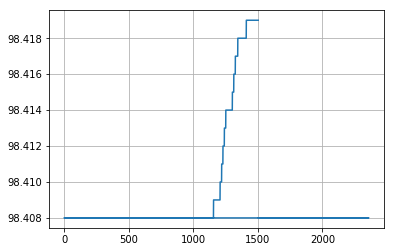

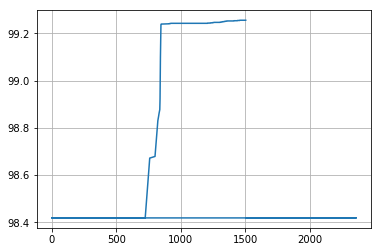

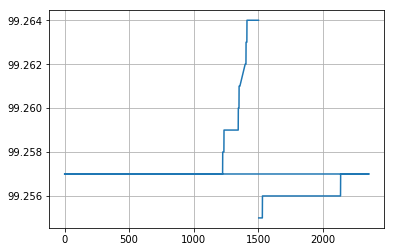

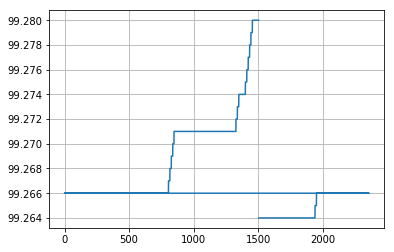

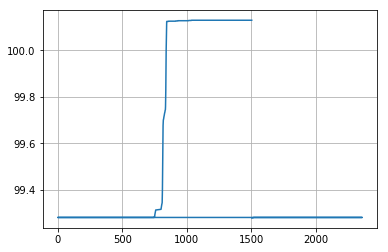

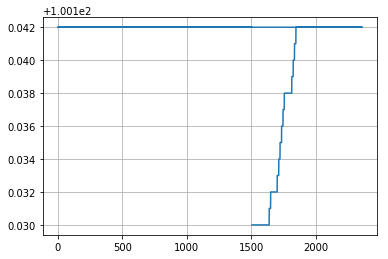

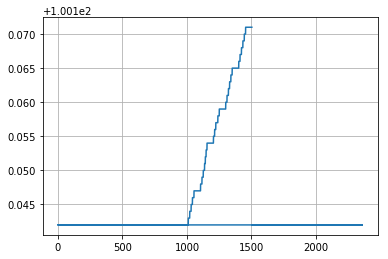

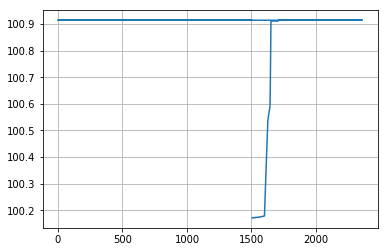

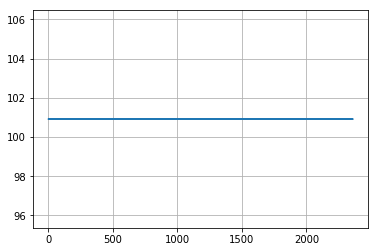

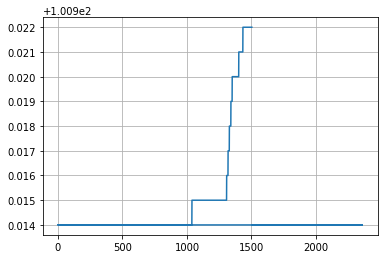

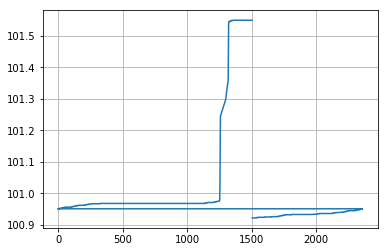

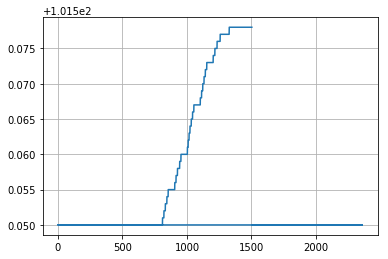

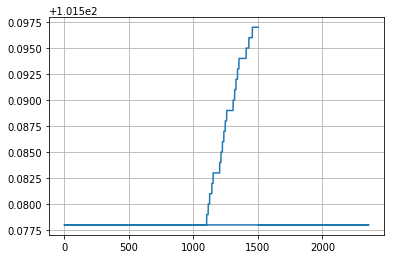

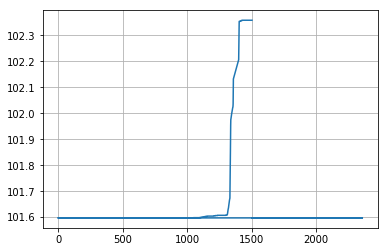

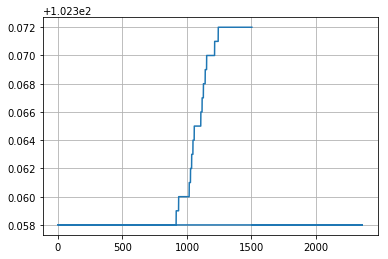

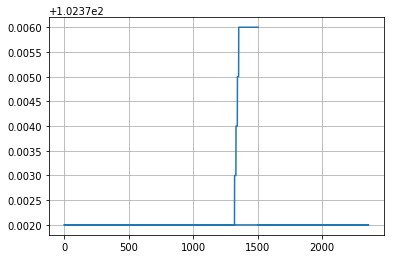

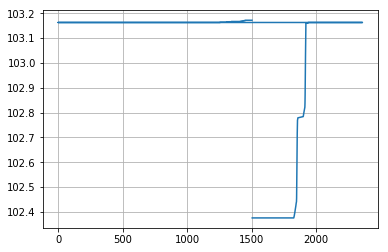

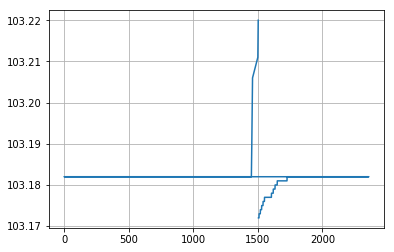

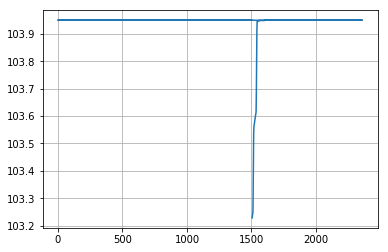

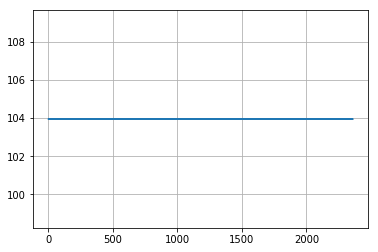

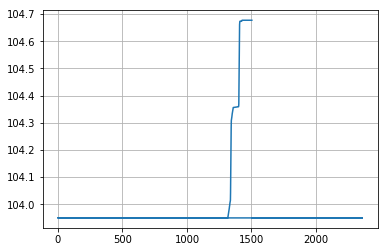

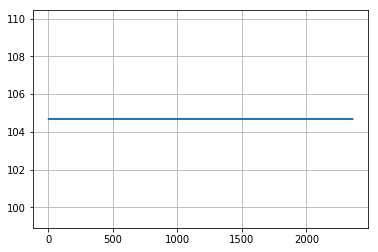

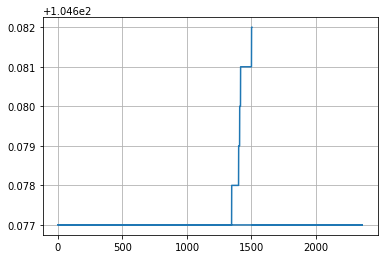

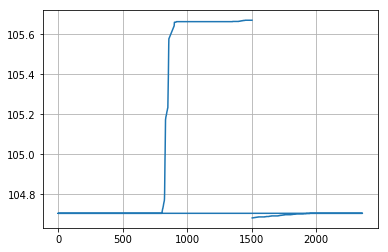

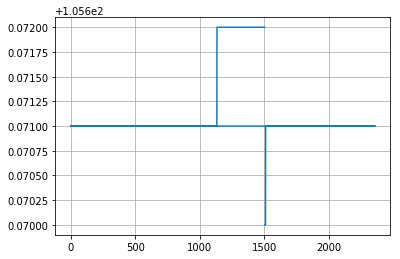

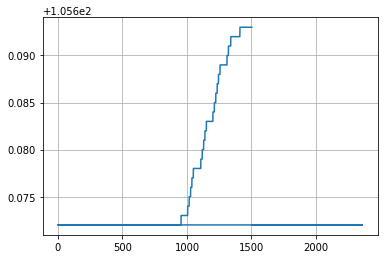

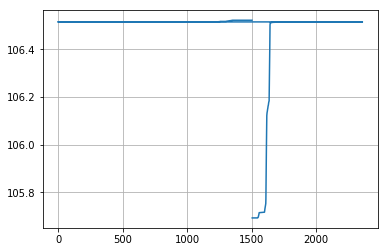

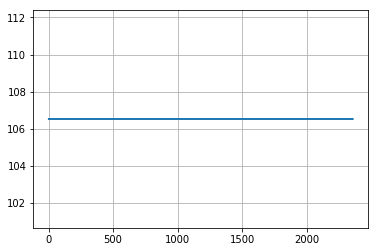

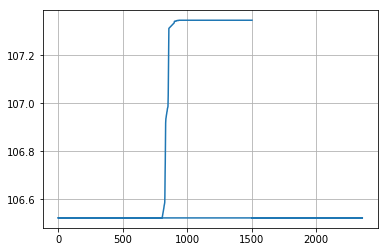

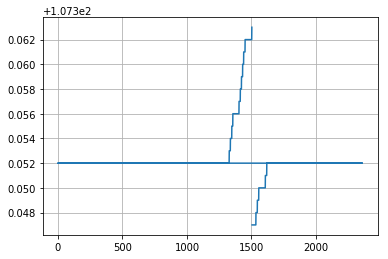

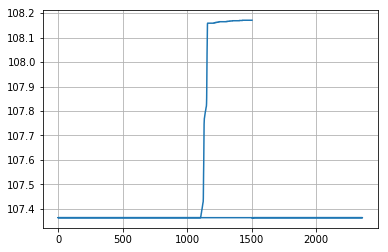

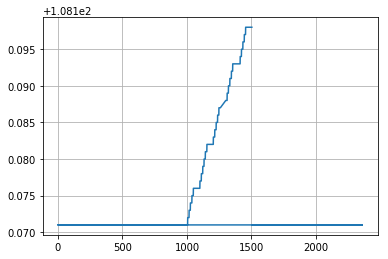

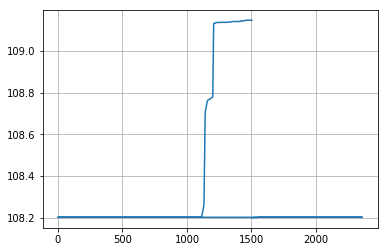

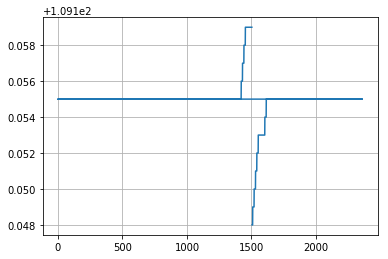

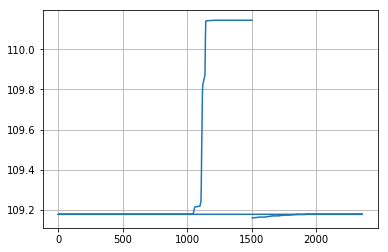

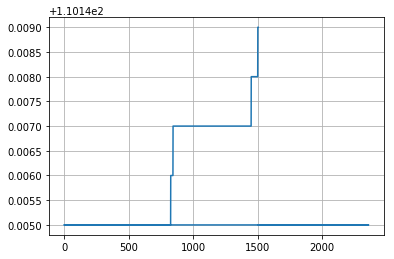

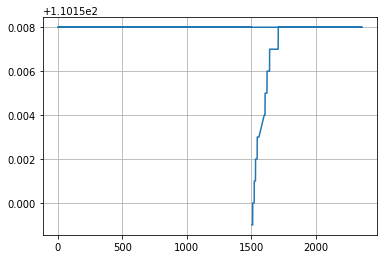

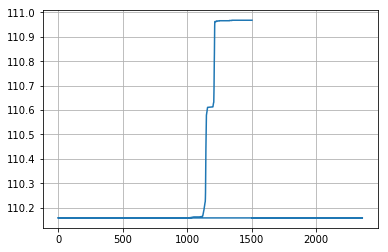

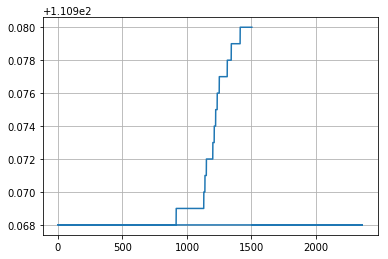

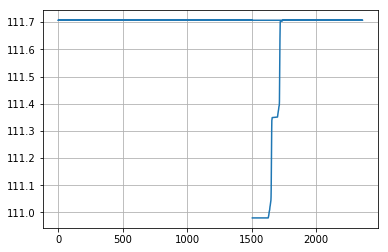

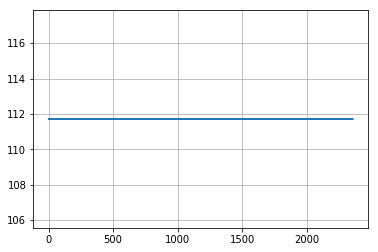

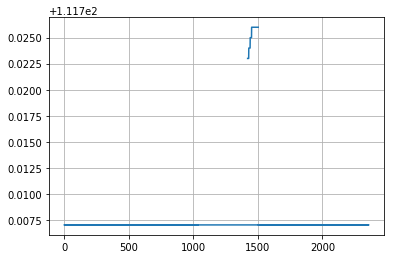

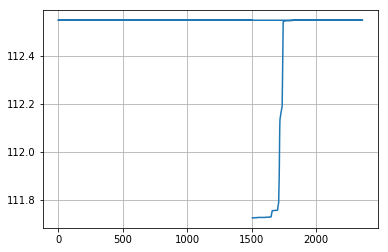

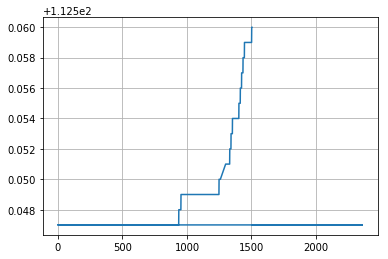

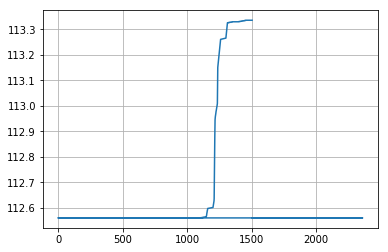

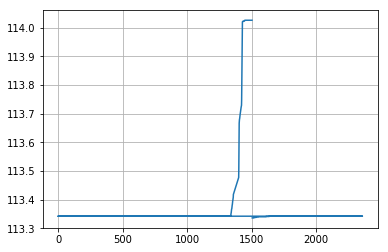

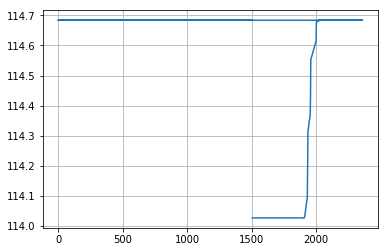

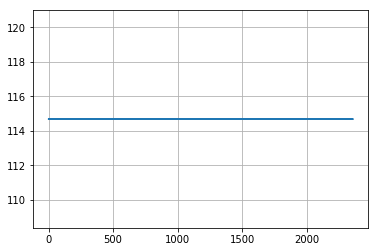

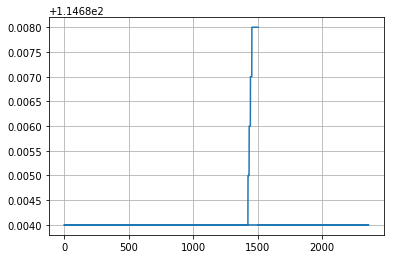

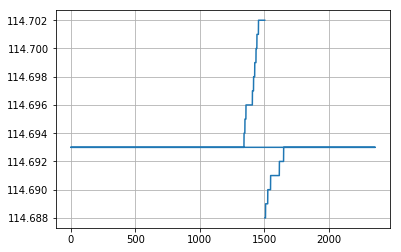

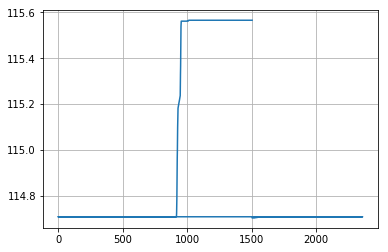

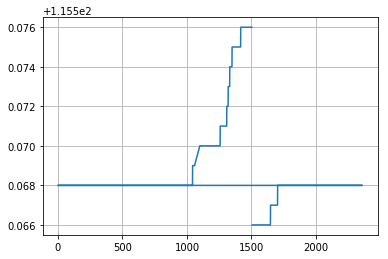

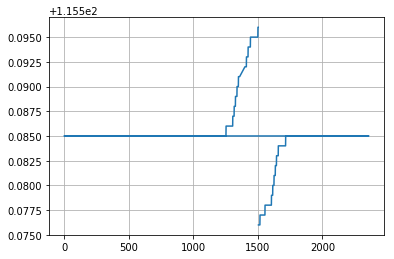

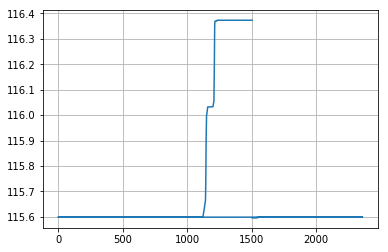

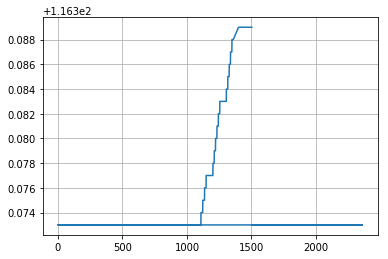

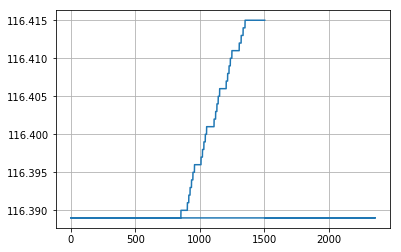

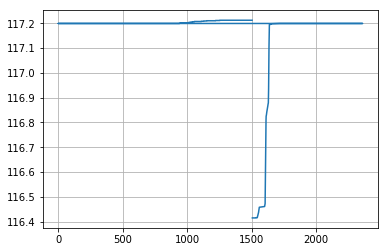

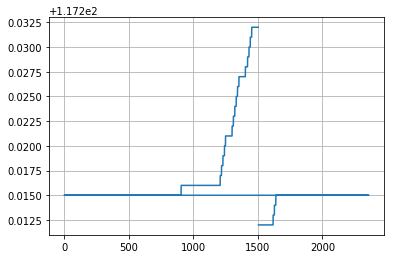

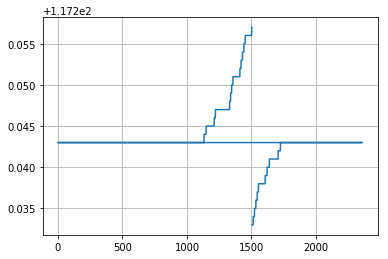

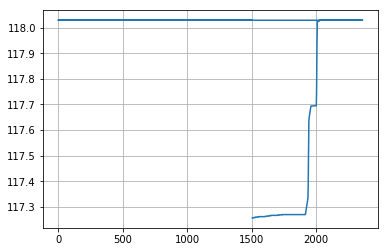

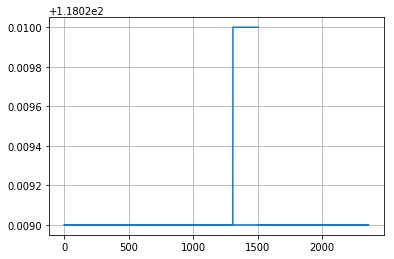

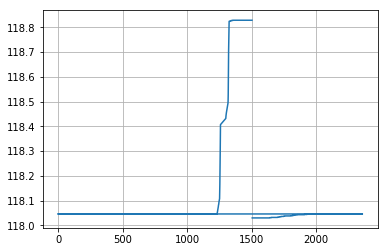

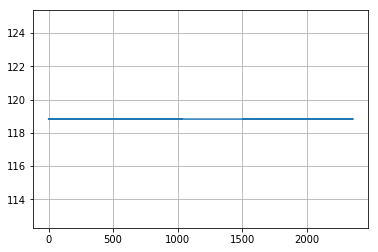

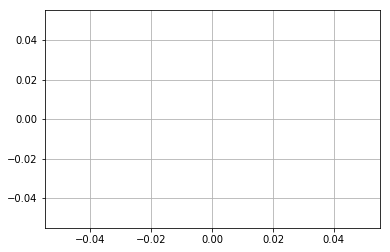

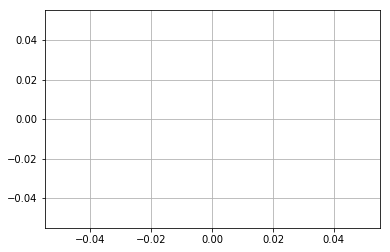

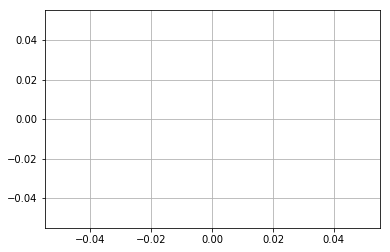

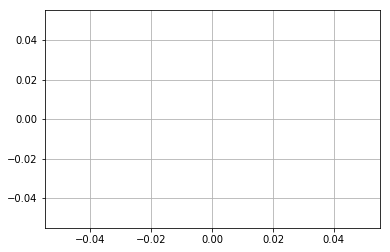

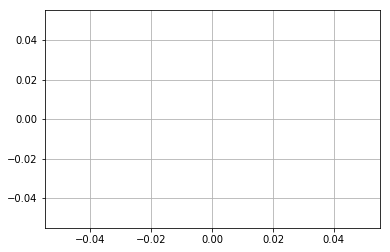

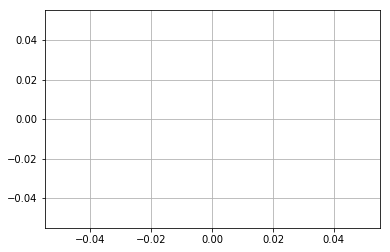

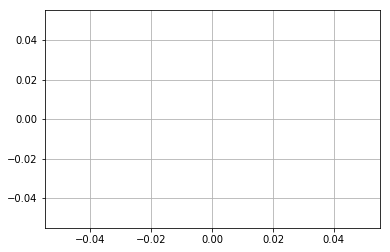

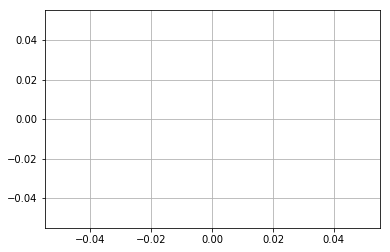

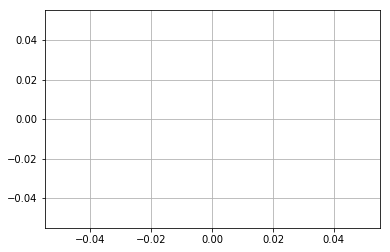

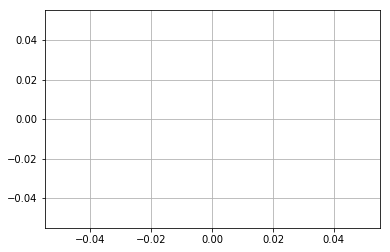

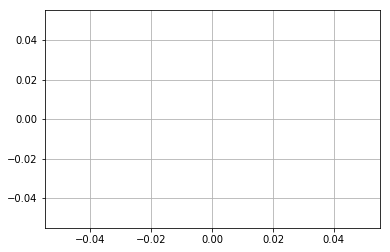

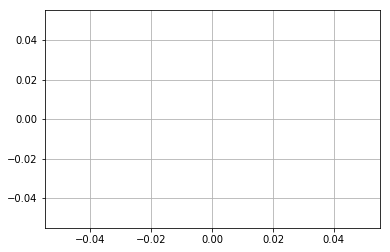

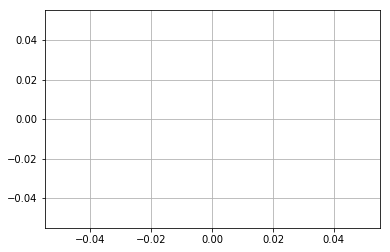

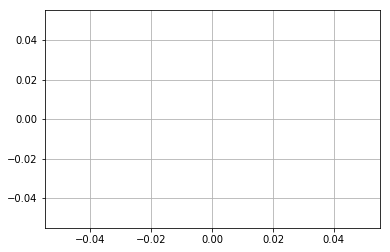

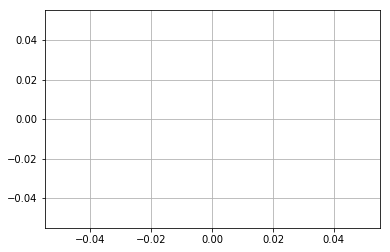

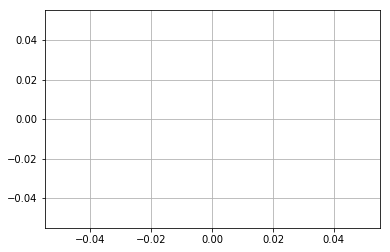

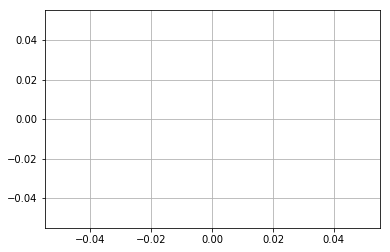

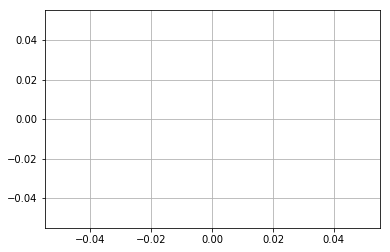

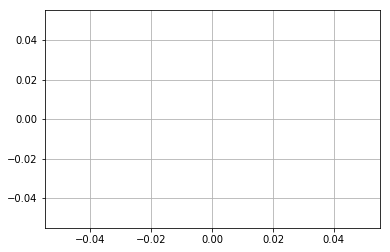

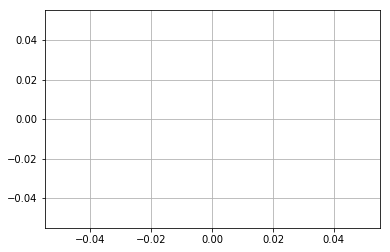

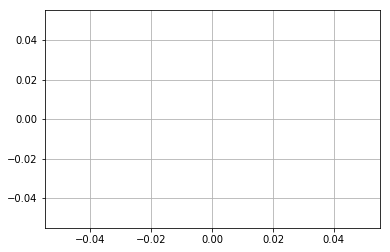

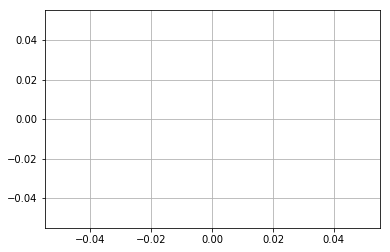

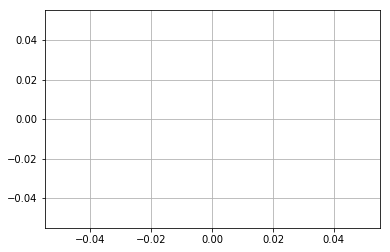

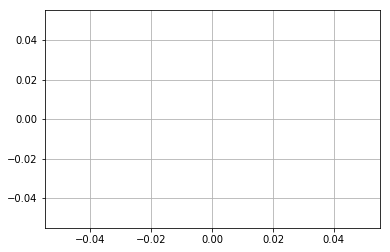

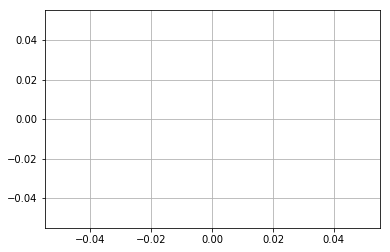

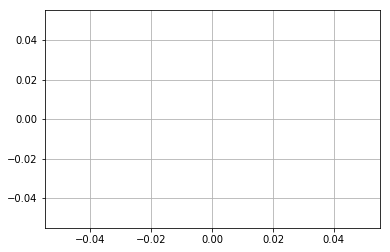

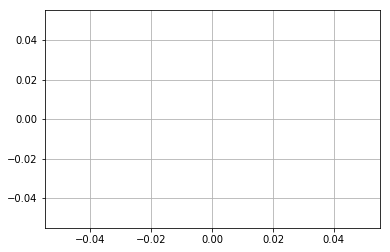

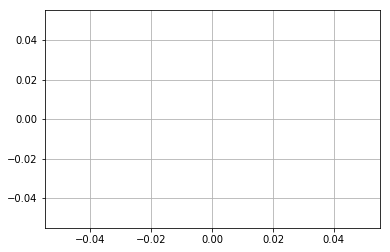

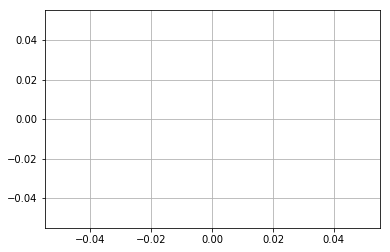

In [3]:
# plotting the dishwasher load for every 24hrs
i = 0
while(i <= x.shape[0]):
    s = np.array(read1.values[i:i+1439,0])
    k = [t[-9:-7]+t[-6:-4] for t in s ]
    k = [int(p) for p in k]
    l = read.values[i:i+1439,0]
    plt.grid(True)
    plt.plot(k,l)
    plt.show()
    i+=1440

In [23]:
# using 1hr data
hr_data = pd.read_csv(path+"household_data_60min_singleindex.csv")
# removing the following columns
del hr_data["interpolated_values"]
del hr_data["DE_KN_residential4_grid_export"]
del hr_data["DE_KN_residential4_pv"]
del hr_data["cet_cest_timestamp"]

# yr_data will have the data from 2016-01-01 to 2017-01-01
yr_data = pd.DataFrame(hr_data.values[2137:10921])
yr_data.columns = hr_data.columns

In [25]:
# just used to count the no. of nulls in each columns in the yr_data
nan_cnt = []

nan_cnt.append(sum(pd.isnull(yr_data['DE_KN_residential4_dishwasher'])))
nan_cnt.append(sum(pd.isnull(yr_data['DE_KN_residential4_ev'])))
nan_cnt.append(sum(pd.isnull(yr_data['DE_KN_residential4_freezer'])))
nan_cnt.append(sum(pd.isnull(yr_data['DE_KN_residential4_grid_import'])))
nan_cnt.append(sum(pd.isnull(yr_data['DE_KN_residential4_heat_pump'])))
nan_cnt.append(sum(pd.isnull(yr_data['DE_KN_residential4_refrigerator'])))
nan_cnt.append(sum(pd.isnull(yr_data['DE_KN_residential4_washing_machine'])))

print(nan_cnt)
print(range(len(yr_data.columns)))

[71, 93, 448, 74, 71, 68, 71]
range(0, 8)


In [26]:
# doing linear extrapolation on data ..ie.. if x is notNull and y in notNull and we have a set of nulls between them,
# we do : 
# gradient = (y-x)/(no. of nulls)
# add gradient to values from x to y recursively so that we fill the gap
df = pd.DataFrame()
for i in range(len(yr_data.columns)):
    if(i != 0):
        df = yr_data.iloc[:,i]
        flag1 = False
        for j in range(df.values.shape[0]):
            if(np.isnan(df.values[j]) and not(flag1)):
                prev = j-1
                flag1 = True
            elif(flag1 and not(np.isnan(df.values[j]))):
                grad = (df.values[j] - df.values[prev])/(j-prev)
                for k in range(prev+1, j):
                    df.values[k] = df.values[k-1] + grad
                flag1 = False
        yr_data[yr_data.columns[i]] = df.values

In [27]:
# exporting the new non null containing data to new csv
yr_data.to_csv("Year_Data_New.csv",sep=",",encoding="utf-8")